# Data-driven model enhancement of late-life lithium-ion batteries

In [4]:
using CSV
using DataFrames
using DataInterpolations
using StatsBase
using LinearAlgebra

using ModelingToolkit
using OrdinaryDiffEq

using Optimization
using OptimizationOptimJL
using LineSearches
import ComponentArrays: ComponentArray

using Stheno
using Measurements
using LogExpFunctions

using CairoMakie
using ColorSchemes

include("src/checkup.jl")
include("src/ecm.jl")
include("src/gp.jl")

include("src/benchmark/soh.jl")
include("src/benchmark/ocv.jl")
include("src/benchmark/rint.jl")
include("src/benchmark/sim.jl")

include("src/plot/dataset.jl")
include("src/plot/benchmark.jl");

## Dataset

In [5]:
files = readdir("data/", join=true)
data = load_data(files)

Dict{Symbol, DataFrame} with 10 entries:
  :Cell7  => 1051865×15 DataFrame…
  :Cell8  => 1043467×15 DataFrame…
  :Cell5  => 1062131×15 DataFrame…
  :Cell9  => 1032350×15 DataFrame…
  :Cell4  => 1082634×15 DataFrame…
  :Cell6  => 1052350×15 DataFrame…
  :Cell2  => 1079640×15 DataFrame…
  :Cell10 => 1024281×15 DataFrame…
  :Cell3  => 1076462×15 DataFrame…
  :Cell1  => 1083126×15 DataFrame…

## Models

In [6]:
ecms = fit_ecm_series(data)

┌ Info: Cell9 ECM fit complete.
└ @ Main c:\Users\Cornejo\Documents\code\test\cell-gp\src\ecm.jl:106
┌ Info: Cell8 ECM fit complete.
└ @ Main c:\Users\Cornejo\Documents\code\test\cell-gp\src\ecm.jl:106
┌ Info: Cell1 ECM fit complete.
└ @ Main c:\Users\Cornejo\Documents\code\test\cell-gp\src\ecm.jl:106
┌ Info: Cell6 ECM fit complete.
└ @ Main c:\Users\Cornejo\Documents\code\test\cell-gp\src\ecm.jl:106
┌ Info: Cell3 ECM fit complete.
└ @ Main c:\Users\Cornejo\Documents\code\test\cell-gp\src\ecm.jl:106
┌ Info: Cell4 ECM fit complete.
└ @ Main c:\Users\Cornejo\Documents\code\test\cell-gp\src\ecm.jl:106
┌ Info: Cell5 ECM fit complete.
└ @ Main c:\Users\Cornejo\Documents\code\test\cell-gp\src\ecm.jl:106
┌ Info: Cell10 ECM fit complete.
└ @ Main c:\Users\Cornejo\Documents\code\test\cell-gp\src\ecm.jl:106
┌ Info: Cell2 ECM fit complete.
└ @ Main c:\Users\Cornejo\Documents\code\test\cell-gp\src\ecm.jl:106
┌ Info: Cell7 ECM fit complete.
└ @ Main c:\Users\Cornejo\Documents\code\test\cell-gp\src\

Dict{Any, Any} with 10 entries:
  :Cell7  => (ecm = ODESystem(0x0000000000000005, Equation[Differential(t)(soc(…
  :Cell8  => (ecm = ODESystem(0x0000000000000008, Equation[Differential(t)(soc(…
  :Cell4  => (ecm = ODESystem(0x0000000000000002, Equation[Differential(t)(soc(…
  :Cell9  => (ecm = ODESystem(0x0000000000000003, Equation[Differential(t)(soc(…
  :Cell5  => (ecm = ODESystem(0x000000000000000a, Equation[Differential(t)(soc(…
  :Cell6  => (ecm = ODESystem(0x0000000000000009, Equation[Differential(t)(soc(…
  :Cell2  => (ecm = ODESystem(0x0000000000000007, Equation[Differential(t)(soc(…
  :Cell10 => (ecm = ODESystem(0x0000000000000004, Equation[Differential(t)(soc(…
  :Cell3  => (ecm = ODESystem(0x0000000000000006, Equation[Differential(t)(soc(…
  :Cell1  => (ecm = ODESystem(0x0000000000000001, Equation[Differential(t)(soc(…

In [7]:
gpms = fit_gpm_series(data)

┌ Info: Cell2 GP-ECM fit complete.
└ @ Main c:\Users\Cornejo\Documents\code\test\cell-gp\src\gp.jl:179
┌ Info: Cell3 GP-ECM fit complete.
└ @ Main c:\Users\Cornejo\Documents\code\test\cell-gp\src\gp.jl:179
┌ Info: Cell1 GP-ECM fit complete.
└ @ Main c:\Users\Cornejo\Documents\code\test\cell-gp\src\gp.jl:179
┌ Info: Cell6 GP-ECM fit complete.
└ @ Main c:\Users\Cornejo\Documents\code\test\cell-gp\src\gp.jl:179
┌ Info: Cell7 GP-ECM fit complete.
└ @ Main c:\Users\Cornejo\Documents\code\test\cell-gp\src\gp.jl:179
┌ Info: Cell4 GP-ECM fit complete.
└ @ Main c:\Users\Cornejo\Documents\code\test\cell-gp\src\gp.jl:179
┌ Info: Cell5 GP-ECM fit complete.
└ @ Main c:\Users\Cornejo\Documents\code\test\cell-gp\src\gp.jl:179
┌ Info: Cell8 GP-ECM fit complete.
└ @ Main c:\Users\Cornejo\Documents\code\test\cell-gp\src\gp.jl:179
┌ Info: Cell10 GP-ECM fit complete.
└ @ Main c:\Users\Cornejo\Documents\code\test\cell-gp\src\gp.jl:179
┌ Info: Cell9 GP-ECM fit complete.
└ @ Main c:\Users\Cornejo\Documents\c

Dict{Any, Any} with 10 entries:
  :Cell7  => (gp = PosteriorGP{GaussianProcessProbabilisticProgramme{@NamedTupl…
  :Cell4  => (gp = PosteriorGP{GaussianProcessProbabilisticProgramme{@NamedTupl…
  :Cell5  => (gp = PosteriorGP{GaussianProcessProbabilisticProgramme{@NamedTupl…
  :Cell8  => (gp = PosteriorGP{GaussianProcessProbabilisticProgramme{@NamedTupl…
  :Cell9  => (gp = PosteriorGP{GaussianProcessProbabilisticProgramme{@NamedTupl…
  :Cell6  => (gp = PosteriorGP{GaussianProcessProbabilisticProgramme{@NamedTupl…
  :Cell2  => (gp = PosteriorGP{GaussianProcessProbabilisticProgramme{@NamedTupl…
  :Cell10 => (gp = PosteriorGP{GaussianProcessProbabilisticProgramme{@NamedTupl…
  :Cell3  => (gp = PosteriorGP{GaussianProcessProbabilisticProgramme{@NamedTupl…
  :Cell1  => (gp = PosteriorGP{GaussianProcessProbabilisticProgramme{@NamedTupl…

## Benchmark

In [8]:
df_cu = summarize_checkups(data)

Row,id,cap,soh,rdc,ocv_mae
,Symbol,Float64,Float64,Float64,Float64
1,Cell1,4.84,100.8,22.1,0.0
2,Cell2,4.76,99.3,22.4,3.3
3,Cell3,4.46,92.9,30.8,7.8
4,Cell4,4.41,92.0,33.8,10.1
5,Cell5,4.16,86.7,42.9,14.1
6,Cell6,3.9,81.2,52.3,17.7
7,Cell7,3.89,81.1,50.2,14.3
8,Cell8,3.75,78.1,54.7,16.2
9,Cell9,3.57,74.5,63.3,17.7


In [9]:
df_sim = benchmark_sim(ecms, gpms, data)

Row,rmse_ecm,q95_ecm,max_ecm,rmse_gpm,q95_gpm,max_gpm,q95_2σ,max_2σ
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,6.83881,14.3127,25.9287,3.0176,6.11213,10.9006,7.52123,54.2735
2,6.59369,13.6913,25.9684,3.18955,6.37669,10.7286,7.5007,54.0947
3,10.0103,20.4827,30.519,4.51084,8.76755,22.4465,7.8514,56.7638
4,9.54514,19.6247,30.77,4.44827,8.34975,32.3003,6.96215,49.6809
5,13.0254,24.9672,48.2043,5.28799,9.85327,48.0495,8.05816,57.5449
6,12.2056,23.1257,34.6983,5.78991,11.0415,28.8938,8.11236,57.4863
7,12.5078,22.8993,33.5926,5.50679,10.3202,35.8026,8.09286,57.1592
8,12.8952,24.1682,44.7139,5.72056,10.9298,38.2748,8.09275,58.7425
9,15.7656,30.722,48.4256,8.89093,18.2685,29.9944,11.0038,65.8339


In [10]:
df_soh = benchmark_soh(ecms, gpms, data)

Row,id,soh,Δsoh_ecm,soh´,Δsoh´_ecm,Δsoh´_gpm
,Symbol,Float64,Float64,Float64,Float64,Measurem…
1,Cell1,100.804,-0.873435,100.0,-0.884956,-1.18±0.42
2,Cell2,99.2544,-3.4248,99.6242,-4.35674,-0.871349±0.0
3,Cell3,92.8528,-5.81256,89.6664,-3.2606,-1.08687±0.0
4,Cell4,91.9537,-4.32551,88.7982,-1.61451,-1.08±0.27
5,Cell5,86.7253,0.724838,84.2567,2.79164,-1.02±0.25
6,Cell6,81.1967,-1.40175,82.212,-3.08889,-0.48±0.24
7,Cell7,81.1277,-1.74868,82.3795,-3.56108,-0.712215±0.0
8,Cell8,78.1498,-2.47055,78.8983,-3.65905,-0.23±0.32
9,Cell9,74.4669,-0.63489,76.4876,-3.05079,0.22±0.31


In [11]:
df_ocv = benchmark_ocv(ecms, gpms, data)

Row,id,mae_ecm,max_ecm,mae_gpm,max_gpm
,Symbol,Float64,Float64,Float64,Float64
1,Cell1,3.91274,7.91212,2.88208,7.87284
2,Cell2,13.0722,31.1348,1.9224,5.61422
3,Cell3,28.053,53.8248,2.45399,5.85292
4,Cell4,21.9699,35.3609,1.59178,3.80819
5,Cell5,6.40327,22.3367,1.60868,5.42276
6,Cell6,15.305,29.2348,1.71078,5.80711
7,Cell7,11.8756,27.0859,2.44057,5.53633
8,Cell8,13.8108,33.4735,1.19992,3.58235
9,Cell9,10.989,18.17,2.0854,7.38225


In [12]:
r2_rdc = benchmark_rdc(ecms, gpms, data)

(r2_ecm = 0.8544271126322637, r2_gpm = 0.9522 ± 0.0039)

## Plots

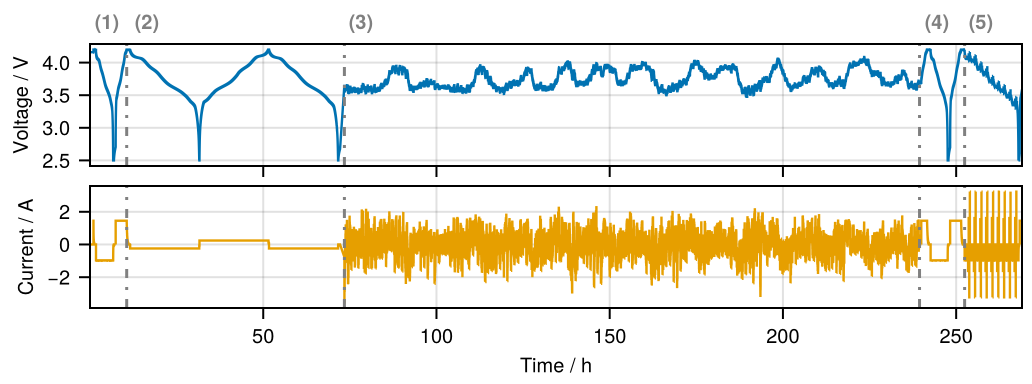

In [13]:
fig1 = plot_checkup_profile(data[:Cell1]) # fresh cell

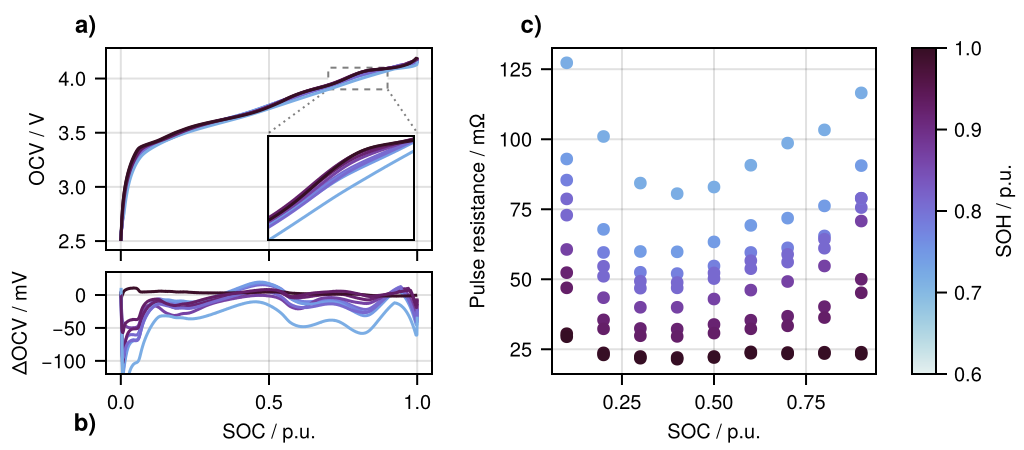

In [14]:
fig2 = plot_checkups(data)

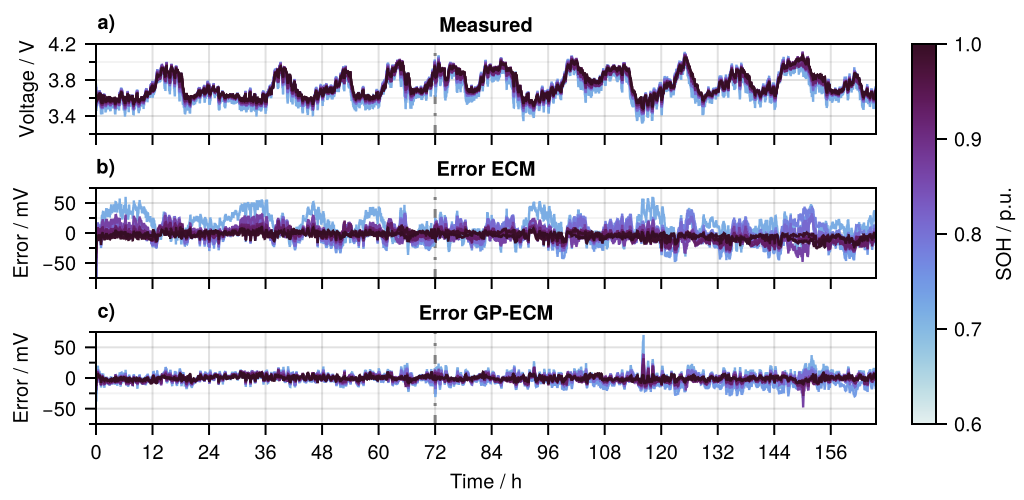

In [15]:
fig3 = plot_sim(ecms, gpms, data)

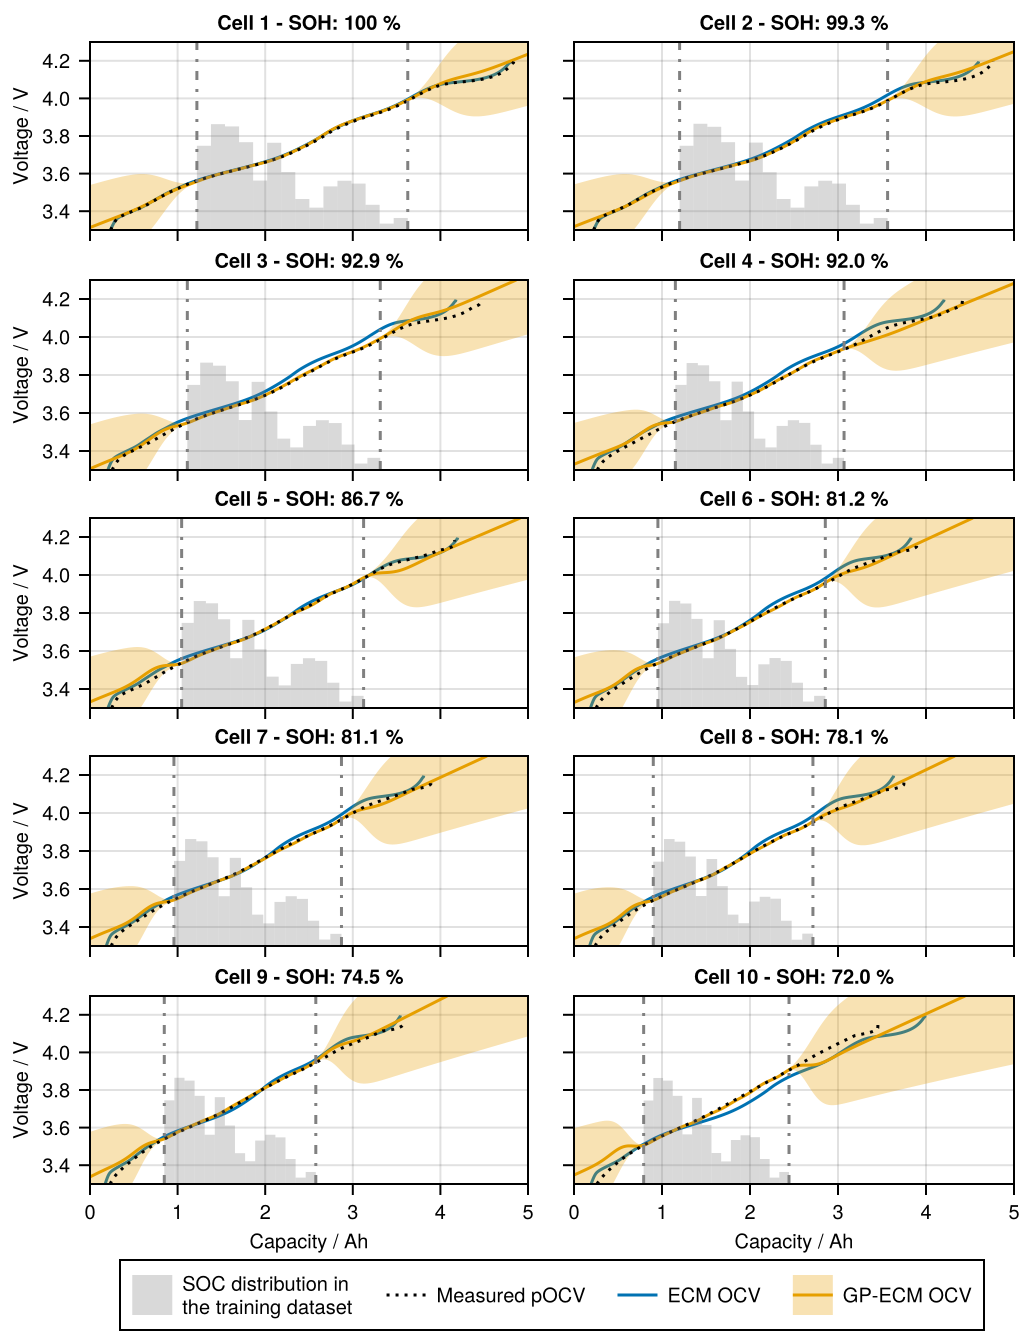

In [18]:
fig4 = plot_ocv_fit(ecms, gpms, data)

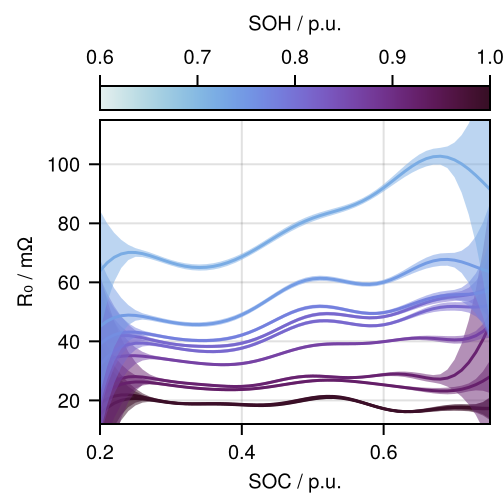

In [16]:
fig5 = plot_gp_rint(gpms, data)

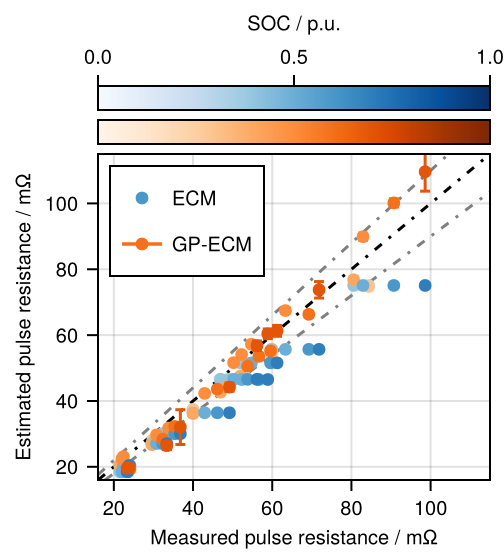

In [17]:
fig6 = plot_rint_fit(ecms, gpms, data)